# Анализ базы клиентов

In [97]:
import numpy as np
import pandas as pd


In [98]:
df = pd.read_excel('data.xlsx')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              8867 non-null   int64         
 1   utilization_date     8867 non-null   datetime64[ns]
 2   cost_of_utilization  8867 non-null   float64       
 3   LTV_forecast         8867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 277.2 KB


In [7]:
df.head()

,user_id,utilization_date,cost_of_utilization,LTV_forecast
0,12345,2020-01-01 00:00:00.000,407.139370,592.860630
1,12346,2020-01-01 02:32:34.903,377.797379,622.202621
2,12347,2020-01-01 04:57:36.087,412.545913,587.454087
3,12348,2020-01-01 05:52:06.719,393.563618,606.436382
4,12349,2020-01-01 08:08:58.564,388.459055,611.540945


In [8]:
df_initial.shape

(8867, 4)

In [20]:
# посмотрим количество значений
pd.DataFrame(
    [
        {
            'Users': len(df['user_id'].value_counts()),
            'Utilization_date': len(df['utilization_date'].value_counts()),
            'Cost_of_utilization': len(df['cost_of_utilization'].value_counts()),
            'LTV_forecast': len(df['LTV_forecast'].value_counts())
        }
    ]
)

,Users,Utilization_date,Cost_of_utilization,LTV_forecast
0,3810,3810,3810,3810


Кажется, будет много дубликатов

In [24]:
pd.DataFrame(
    [
        {
            'Number of duplicates': df.duplicated().sum(),
            'Number of rows': df_initial.shape[0]
        }
    ]
)

,Number of duplicates,Number of rows
0,5057,8867


In [26]:
df.drop_duplicates(inplace=True)

In [27]:
f"Теперь всего {df.shape[0]} строк"

'Теперь всего 3810 строк'

**Сделаем аналитику по месяцам**


In [39]:
df['date'] = df['utilization_date'].dt.to_period("m")

In [52]:
df.head()

,user_id,utilization_date,cost_of_utilization,LTV_forecast,date
0,12345,2020-01-01 00:00:00.000,407.139370,592.860630,2020-01
1,12346,2020-01-01 02:32:34.903,377.797379,622.202621,2020-01
2,12347,2020-01-01 04:57:36.087,412.545913,587.454087,2020-01
3,12348,2020-01-01 05:52:06.719,393.563618,606.436382,2020-01
4,12349,2020-01-01 08:08:58.564,388.459055,611.540945,2020-01


In [41]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of clients per month')

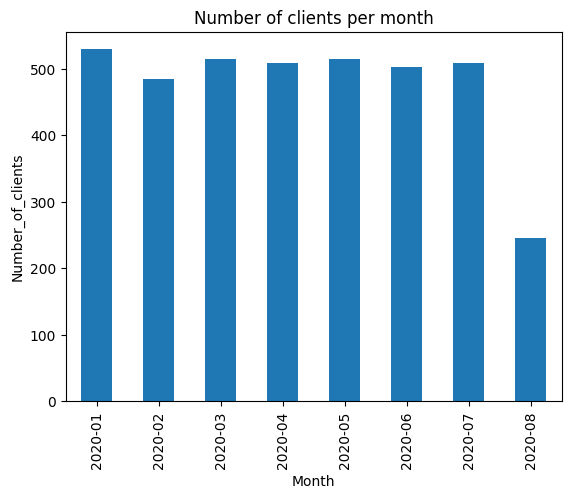

In [95]:
df.groupby(['date'])['user_id'].nunique().plot.bar()

plt.xlabel('Month')
plt.ylabel('Number_of_clients')

plt.title("Number of clients per month")

Text(0.5, 1.0, 'Cost of utilization per month')

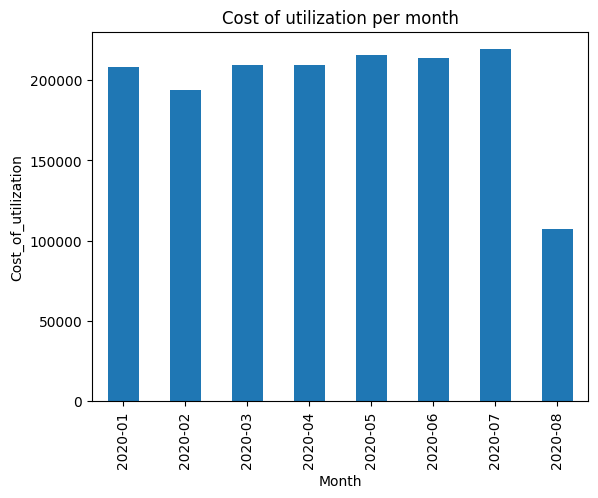

In [94]:
df.groupby(['date'])['cost_of_utilization'].sum().plot.bar()

plt.xlabel('Month')
plt.ylabel('Cost_of_utilization')

plt.title("Cost of utilization per month")

Text(0.5, 1.0, 'LTV forecast per month')

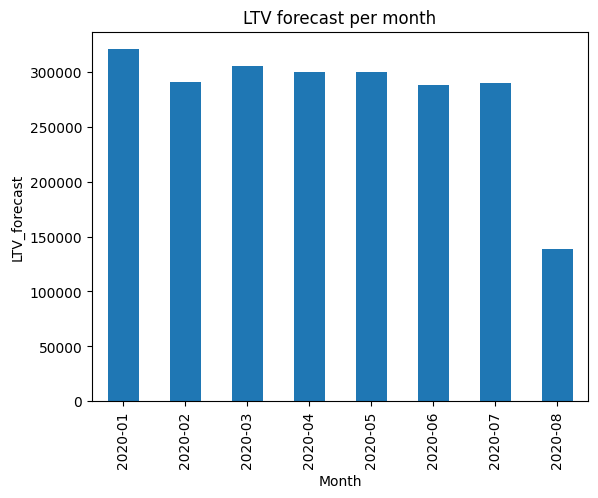

In [93]:
df.groupby(['date'])['LTV_forecast'].sum().plot.bar()

plt.xlabel('Month')
plt.ylabel('LTV_forecast')

plt.title("LTV forecast per month")


In [96]:
monthly = df.groupby(['date']).agg({
    'user_id': ['count'],
    'cost_of_utilization': ['sum'],
    'LTV_forecast': ['sum']
})
monthly.columns = monthly.columns.map(' '.join).str.strip()
monthly

,user_id count,cost_of_utilization sum,LTV_forecast sum
date,,,
2020-01,529,208439.999275,320560.000725
2020-02,485,193973.065914,291026.934086
2020-03,515,209645.818806,305354.181194
2020-04,509,209601.483031,299398.516969
2020-05,515,215513.018028,299486.981972
2020-06,502,213590.792713,288409.207287
2020-07,509,219305.994314,289694.005686
2020-08,246,107096.531052,138903.468948


Введем пару новых метрик, может они прояснят ситуацию. Больше метрик Богу метрик!

In [80]:
monthly['Avg_cost_of_utilization'] = monthly['cost_of_utilization sum'] /  monthly['user_id count']
monthly ['Avg_LTV_forecast'] = monthly['LTV_forecast sum'] /  monthly['user_id count']
monthly[['Avg_cost_of_utilization', 'Avg_LTV_forecast']]

,Avg_cost_of_utilization,Avg_LTV_forecast
date,,
2020-01,394.026464,605.973536
2020-02,399.944466,600.055534
2020-03,407.079260,592.920740
2020-04,411.790733,588.209267
2020-05,418.471880,581.528120
2020-06,425.479667,574.520333
2020-07,430.856570,569.143430
2020-08,435.351752,564.648248


In [81]:
monthly = monthly.reset_index(level='date')
monthly['date'] = monthly['date'].map(str)

In [82]:
monthly

,date,user_id count,cost_of_utilization sum,LTV_forecast sum,Avg_cost_of_utilization,Avg_LTV_forecast
0,2020-01,529,208439.999275,320560.000725,394.026464,605.973536
1,2020-02,485,193973.065914,291026.934086,399.944466,600.055534
2,2020-03,515,209645.818806,305354.181194,407.079260,592.920740
3,2020-04,509,209601.483031,299398.516969,411.790733,588.209267
4,2020-05,515,215513.018028,299486.981972,418.471880,581.528120
5,2020-06,502,213590.792713,288409.207287,425.479667,574.520333
6,2020-07,509,219305.994314,289694.005686,430.856570,569.143430
7,2020-08,246,107096.531052,138903.468948,435.351752,564.648248


Кажется что-то прояснилось. Построим графики, мы же аналитики!

Text(0.5, 1.0, 'Cost of utilization and LTV forecast comparing')

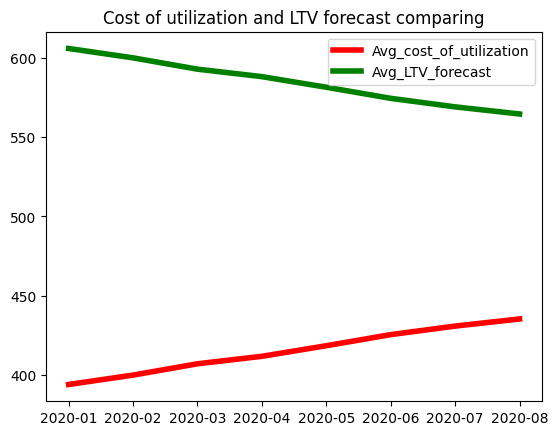

In [91]:
plt.plot(
    monthly['date'], 'Avg_cost_of_utilization',
    data=monthly[['Avg_cost_of_utilization', 'Avg_LTV_forecast']], color='red', linewidth=4
)

plt.plot(
    monthly['date'], 'Avg_LTV_forecast',
    data=monthly[['Avg_cost_of_utilization', 'Avg_LTV_forecast']], color='green', linewidth=4
)

plt.legend()
plt.title("Cost of utilization and LTV forecast comparing")


# Выводы:
1. В базе очень много дубликатов, возможно есть проблемы в сборе данных.
2. Средняя стоимость привлечения растёт, а среднее LTV падает. Кажется, есть проблемы с клиентами.
